In [1]:
# note on high redshift standardizable candles

In [1]:
%matplotlib notebook

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#from MyUnit import NaturalUnit
import numpy as np
import sys,os
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import gamma 
from scipy.integrate import quad

path = '/home/chensun/tomerv_storage/quasars/'
sys.path.insert(1, path)
import igm as ig
import data as dt
import chi2 as ch

from ag_probs import omega_plasma

In [4]:
data = dt.load_quasars("./likelihoods", "quasar.dat")
(qso_name_arr,
 qso_z_arr,
 qso_f2500_arr,
 qso_df2500_arr,
 qso_f2keV_arr,
 qso_df2keV_low_arr,
 qso_df2keV_up_arr) = data

In [68]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

(chi2, 
 mu_th_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2)

112132.87903339203


In [99]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
x = (10**-15.9, 1e-11, 0.6, 0.66, 0.71, 5.)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

(chi2, 
 mu_th_ga11_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2)

122531.70409303124


In [94]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
x = (10**-15.9, 1e-12, 0.6, 0.66, 0.71, 5.)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

(chi2, 
 mu_th_ga12_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2)

112336.28268566505


<IPython.core.display.Javascript object>


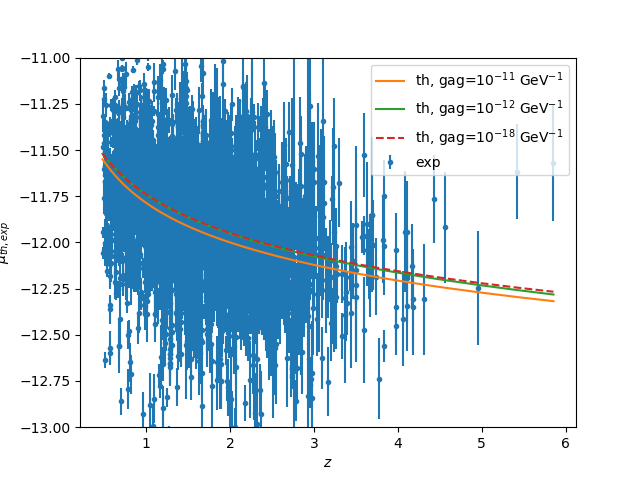

In [97]:
plt.subplots()
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp')

x, y = zip(*sorted(zip(qso_z_arr, mu_th_ga11_arr)))
plt.plot(x, y, '-', zorder=10, label='th, gag=10$^{-11}$ GeV$^{-1}$')

x, y = zip(*sorted(zip(qso_z_arr, mu_th_ga12_arr)))
plt.plot(x, y, '-', zorder=11, label='th, gag=10$^{-12}$ GeV$^{-1}$')

x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
plt.plot(x, y, '--', zorder=12, label='th, gag=10$^{-18}$ GeV$^{-1}$')
#plt.xscale('log')
plt.ylim(-13, -11)
plt.ylabel('$\mu_{th, exp}$')
plt.xlabel('$z$')
plt.legend()

In [53]:
%%time
# for loop
ch.chi2_quasars(x, data=data, vectorize=False, **quasars_kwargs)

CPU times: user 2.33 s, sys: 784 µs, total: 2.33 s
Wall time: 2.44 s


124268.75654994203

In [54]:
%%time
# vectorized
ch.chi2_quasars(x, data=data, vectorize=True, **quasars_kwargs)

CPU times: user 2.29 s, sys: 2.95 ms, total: 2.29 s
Wall time: 2.84 s


124268.75654994218

check the UV-X formula by hand
\begin{align}
\log_{10}(f_X) = \gamma \log_{10}(f_{UV}) + 2(\gamma - 1) \log_{10}(D_L) + \beta + (\gamma - 1) \log_{10}(4\pi)
\end{align}

In [75]:
# take one data point from Bisogni table 2
# z = 0.78
-31.12-(-28.21)*0.6

-14.194000000000003

In [78]:
# compute log(fX)-gamma log(fUV)
# w/ beta = 4 (c.f. Risaliti and Lusso at Nature, 1811.02590)
# w/ LCDM
# w/ DL in cm
2.*(0.6-1)*np.log10(5023*3.0857e+24) +4 + (0.6-1)*np.log10(4.*np.pi)

-17.99193744854401

In [77]:
5023*3.0857e+24

1.54994711e+28

In [45]:
from classy import Class
import classy
print(classy.__file__)

params = {
    #'gauge':'synchronous',
    'gauge':'newtonian',
    'input_verbose' : 1,
    'background_verbose' : 2,
    'thermodynamics_verbose': 1,
    'perturbations_verbose': 2,
    'h': 0.7, #0.673,
    'omega_b': 0.02205,
    'Omega_cdm': (0.3 - 0.02205/0.7**2),
    #'omega_cdm': 0.1199,
    #'omega_cdm': 0.01,
    'tau_reio': 0.089,
    'A_s':np.exp(3.089)*10**-10,
    'n_s':0.9603,
    'N_ur' : 2.03351,
    'N_ncdm' : 1,
    'm_ncdm' : 0.06,
    'T_ncdm' : 0.715985, 
    'T_cmb' : 2.2755
}


try:
    cosmo.struct_cleanup()
except:
    pass
# Create an instance of the CLASS wrapper
cosmo = Class()

# Set the parameters to the cosmological code
cosmo.set(params)
cosmo.compute()

print(cosmo.age())

/home/chen/anaconda3/envs/py38/lib/python3.8/site-packages/classy.cpython-38-x86_64-linux-gnu.so
13.45511764177868


In [124]:
# manually load up the data to check
def log10FX(log10FUV, gamma, beta, z):
    """ w/o axions
    """
    DL_in_cm = cosmo.luminosity_distance(z)*3.0857e+24
    res = gamma*log10FUV + beta + (gamma-1)*np.log10(4.*np.pi) + 2.*(gamma-1)*np.log10(DL_in_cm)
    return res


In [125]:
qso_f2500_arr
qso_f2keV_arr

array([-31.1167, -32.0376, -31.1971, ..., -31.9086, -31.3855, -31.4902])

In [126]:
log10FX_th_arr = []
for i,_ in enumerate(qso_z_arr):
    log10FUV = qso_f2500_arr[i]
    z = qso_z_arr[i]
    log10FX_th_arr.append(log10FX(log10FUV, 
                               gamma=0.71, 
                               beta=5., 
                               z=z))

<IPython.core.display.Javascript object>


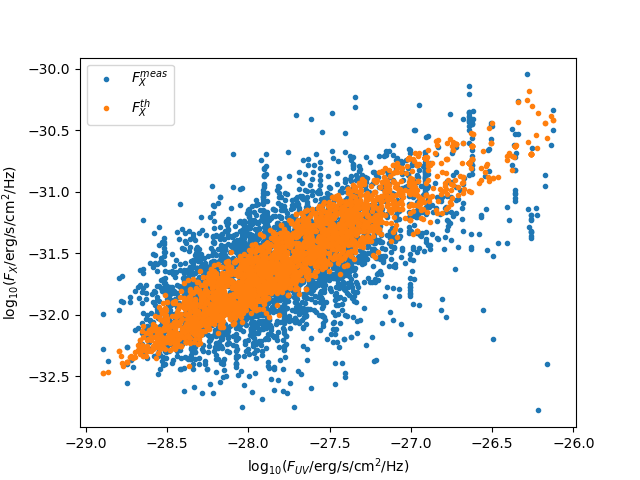

Text(0, 0.5, '$\\log_{10}(F_{X}/\\mathrm{erg/s/cm^2/Hz})$')

In [127]:
plt.subplots()
plt.plot(qso_f2500_arr, qso_f2keV_arr, '.', label=r'$F_{X}^{meas}$')
#plt.plot(qso_f2500_arr, fun_linear(qso_f2500_arr, gamma=0.65, beta=-13.5))
plt.plot(qso_f2500_arr, log10FX_th_arr, '.', label=r'$F_{X}^{th}$')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel(r'$\log_{10}(F_{UV}/\mathrm{erg/s/cm^2/Hz})$')
plt.ylabel(r'$\log_{10}(F_{X}/\mathrm{erg/s/cm^2/Hz})$')

In [71]:
cosmo.luminosity_distance(1)

6604.407462675764

<IPython.core.display.Javascript object>


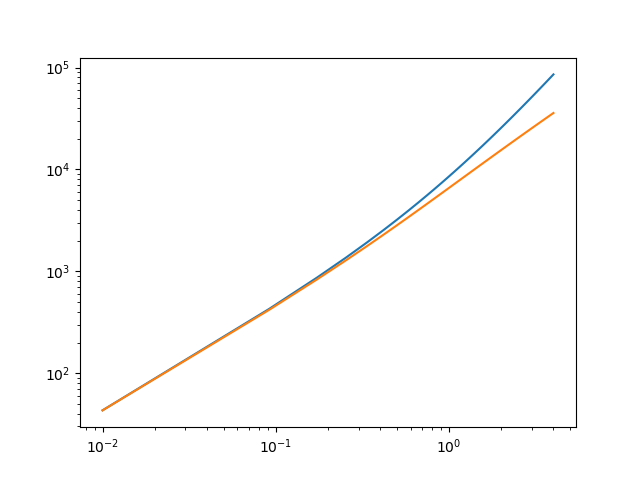

In [74]:
z_arr = np.linspace(0.01, 4)
DL_proxy_arr = (1+z_arr)*z_arr*4282.7494
DL_arr = [cosmo.luminosity_distance(z) for z in z_arr]
plt.subplots()
plt.plot(z_arr, DL_proxy_arr)
plt.plot(z_arr, DL_arr)
plt.xscale('log')
plt.yscale('log')

In [90]:
# test chi2 of quasar